<a href="https://colab.research.google.com/github/ankitroy22/cat-vs-dog-classification/blob/main/cat_v_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Create Kaggle directory and copy Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
# Download Dogs vs Cats dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [4]:
# Unzip the dataset

import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [69]:
# Import necessary libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [55]:
# Load training and testing datasets

train_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256))
test_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [56]:
# Normalize image pixel values

def process (image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label
train_ds = train_dataset.map(process)
test_ds = test_dataset.map(process)

In [57]:
# Define the CNN model

model = Sequential()
model.add(Conv2D(32, (3,3),padding = "valid",activation = "relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, (3,3),padding = "valid",activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, (3,3),padding = "valid",activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [70]:
# Display model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [59]:
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics = ["accuracy"])

In [60]:
history = model.fit(train_ds, epochs = 20, validation_data=test_ds)

Epoch 1/20
625/625 [==============================] - 71s 108ms/step - loss: 1.2391 - accuracy: 0.5607 - val_loss: 0.6901 - val_accuracy: 0.5248
Epoch 2/20
625/625 [==============================] - 65s 104ms/step - loss: 0.6666 - accuracy: 0.5903 - val_loss: 0.6675 - val_accuracy: 0.5702
Epoch 3/20
625/625 [==============================] - 68s 109ms/step - loss: 0.6431 - accuracy: 0.6202 - val_loss: 0.7369 - val_accuracy: 0.6518
Epoch 4/20
625/625 [==============================] - 68s 108ms/step - loss: 0.6359 - accuracy: 0.6295 - val_loss: 0.6705 - val_accuracy: 0.5428
Epoch 5/20
625/625 [==============================] - 67s 107ms/step - loss: 0.5765 - accuracy: 0.6798 - val_loss: 0.5830 - val_accuracy: 0.6644
Epoch 6/20
625/625 [==============================] - 65s 103ms/step - loss: 0.5057 - accuracy: 0.7329 - val_loss: 0.5093 - val_accuracy: 0.7262
Epoch 7/20
625/625 [==============================] - 68s 108ms/step - loss: 0.4299 - accuracy: 0.7770 - val_loss: 0.6071 - val_ac

In [61]:
import matplotlib.pyplot as plt

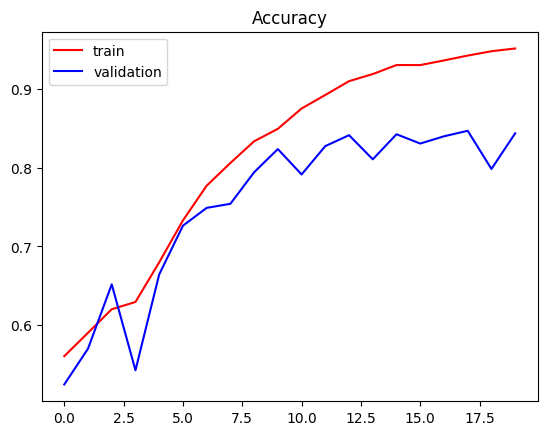

In [62]:
# Plot training and validation accuracy

plt.plot(history.history["accuracy"], color ="red", label ="train")
plt.plot(history.history["val_accuracy"], color="blue", label ="validation")
plt.legend()
plt.title("Accuracy")
plt.show()

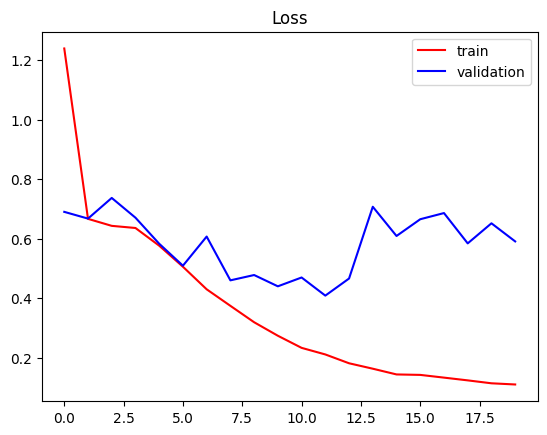

In [63]:
# Plot training and validation loss

plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.title("Loss")
plt.show()

In [64]:
import cv2
test_img = cv2.imread("/content/test/pexels-valeriya-1805164.jpg")

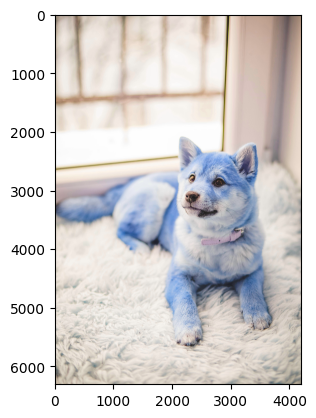

In [65]:
plt.imshow(test_img)

In [66]:
test_img.shape

(6306, 4204, 3)

In [67]:
# Preprocess test image and make prediction

test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1,256,256,3))

In [68]:
# Predict the class of the test image

model.predict(test_input)

1/1 [==============================] - 0s 104ms/step


array([[1.]], dtype=float32)